### Code used for single cell data analysis and generation of anndata object
_Inhibition of LTβR-signalling blocks epithelial apoptosis and activates Wnt-induced regeneration in lung_ <br> Thomas M Conlon, Mathias Heikenwälder et. al and Ali Yildirim

In [1]:
## This Notebook is based on the anndata object generated in Fig1_preprocess_generate_object.ipynb
## Generates Figure 1 k, l and Supplementary Figure S2 c, d

import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
import pandas as pd
import seaborn as sb
folder = "/20200525_Yildirim_6mSmokedMiceLTbeta_meshal.ansari/"

import warnings
warnings.filterwarnings("ignore")
sc.settings.verbosity = 3
sc.logging.print_version_and_date()

Running Scanpy 1.5.2.dev28+gb910afc6, on 2020-07-06 14:50.


In [2]:
from matplotlib.colors import LinearSegmentedColormap
blue_red = LinearSegmentedColormap.from_list("custom", [(0, "royalblue"), (0.5, "azure"), (1, "red")], N = 256)

sc.settings.set_figure_params(vector_friendly = True)
plt.rcParams["figure.figsize"] = (6, 5)
sb.set_style("ticks")

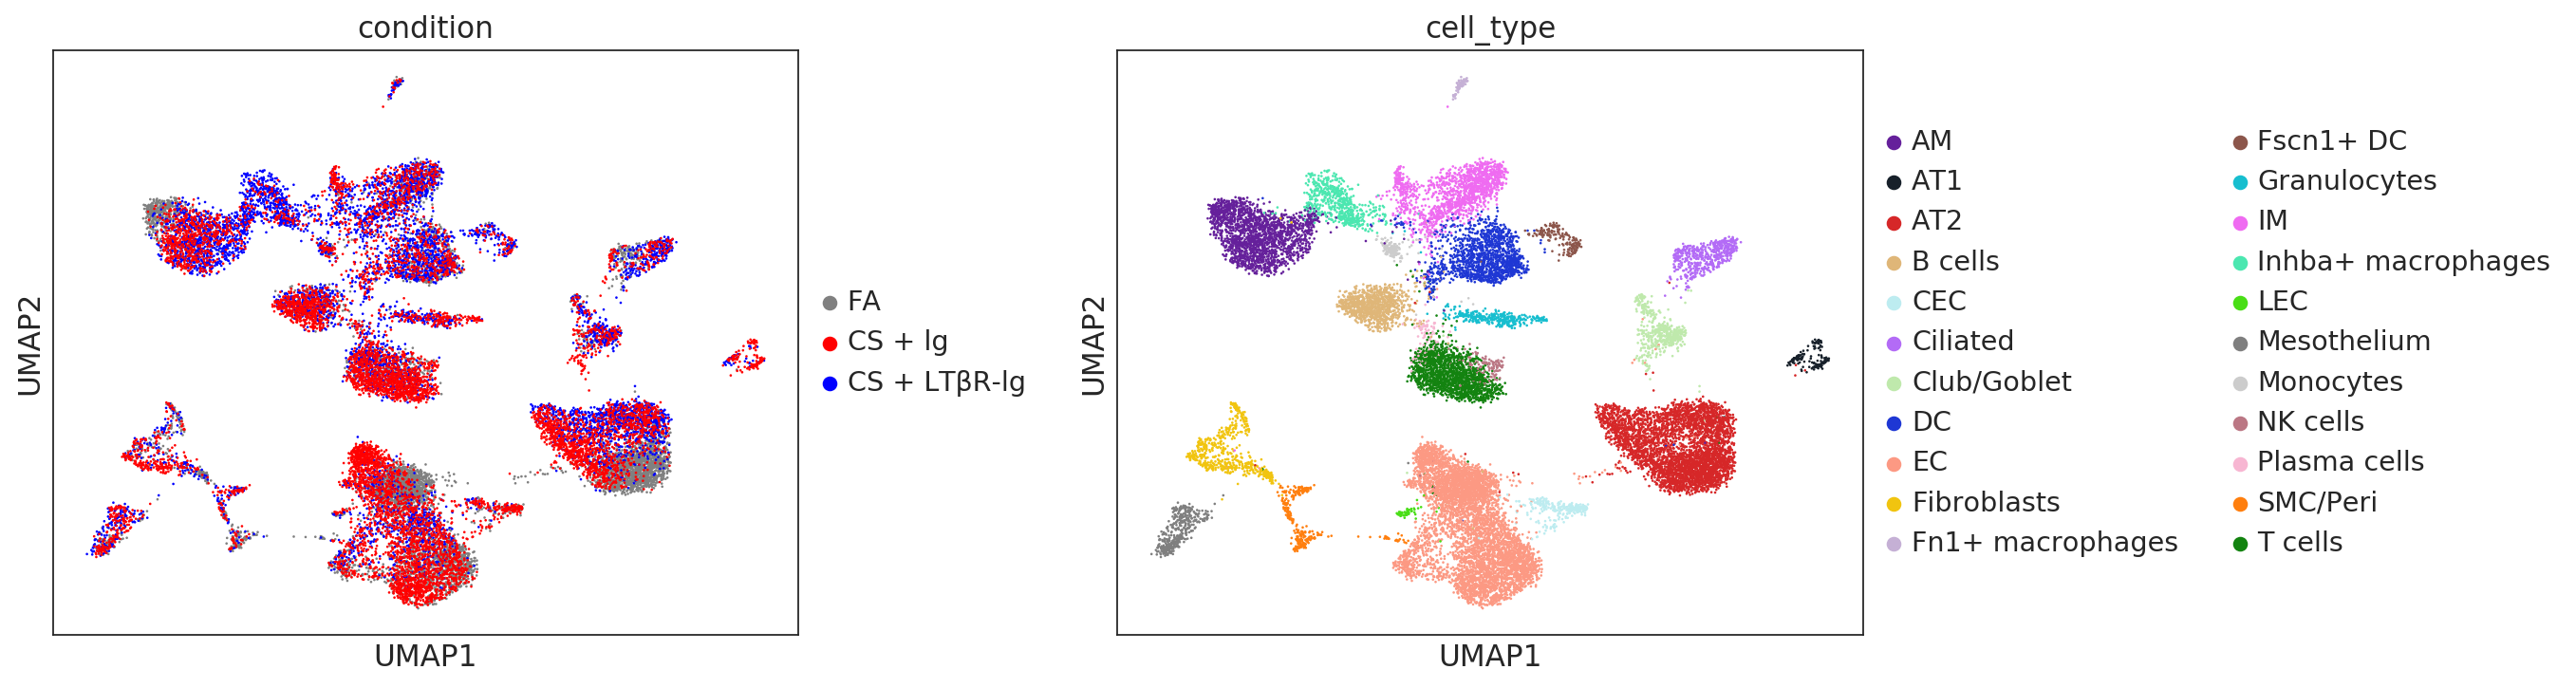

In [5]:
adata = sc.read(folder + "6m_smoked_mice_LTbeta_treatment.h5ad")

rename_map = {"6m FA": "FA", "6m CS": "CS + lg", "6m CS + LTbeta": "CS + LTβR-lg"}
adata.obs["condition"] = [rename_map[cond] for cond in adata.obs.condition]
sc._utils.sanitize_anndata(adata)
adata.obs.condition.cat.reorder_categories(["FA", "CS + lg", "CS + LTβR-lg"], inplace = True)

sc.pl.umap(adata, color = ["condition", "cell_type"], wspace = 0.3)

### Fig 1 k) Score based on genes associated with positive Regulation of NIK

Genes used for Scoring	74
computing score 'positive regulation of NIK score'
    finished: added
    'positive regulation of NIK score', score of gene set (adata.obs).
    999 total control genes are used. (0:00:00)


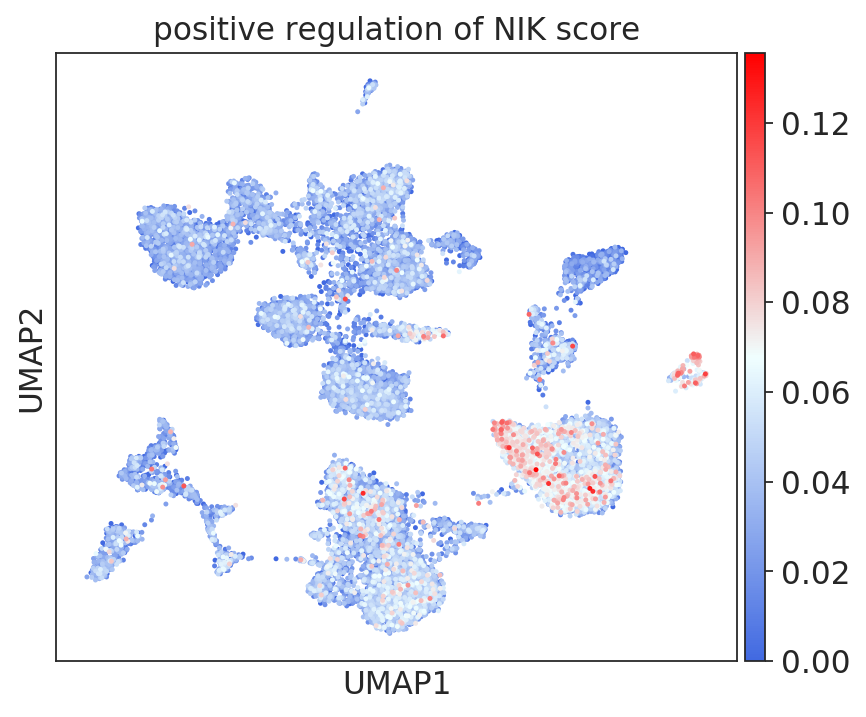

In [6]:
pos_nik = pd.read_csv(folder + "pos_NIK_signalling_GO_Term.txt", sep = "\t")
genes = np.intersect1d(pos_nik.iloc[:, 0].values, adata.var_names.values)
print("Genes used for Scoring\t%s" %(len(genes)))

s_name = "positive regulation of NIK score"
sc.tl.score_genes(adata, gene_list = genes, score_name = s_name)
sc.pl.umap(adata, color = s_name, cmap = blue_red, vmin = 0, size = 20)

### Suplementary Figure 2 c) positive Regulation of NIK score on Epithelial Subset

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:03)
computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:08)


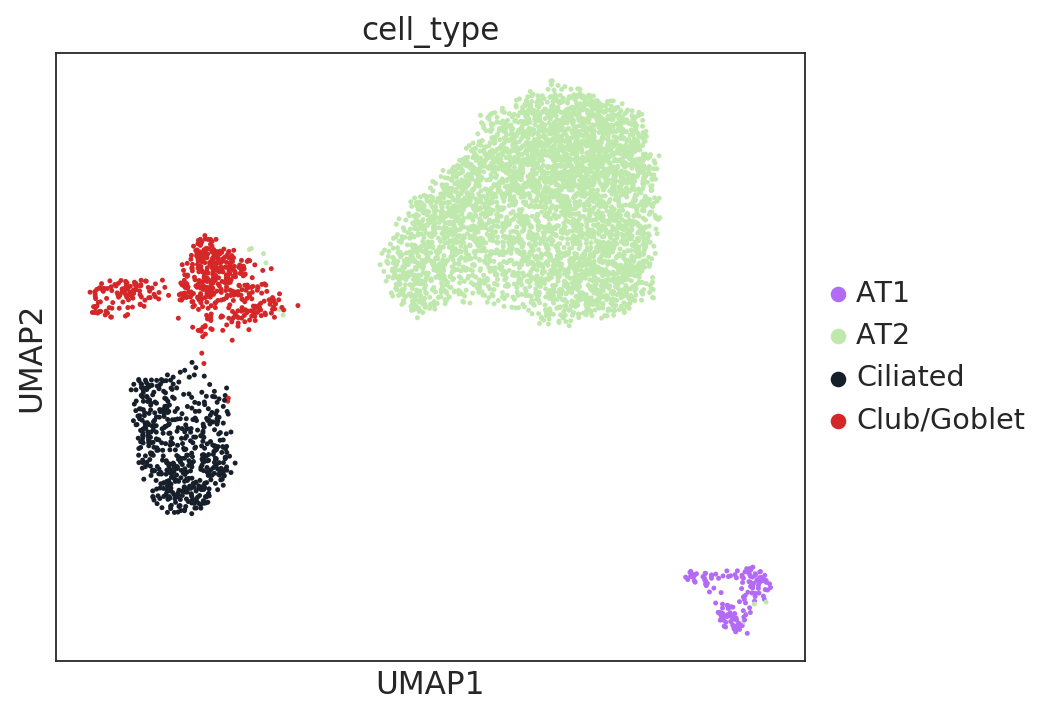

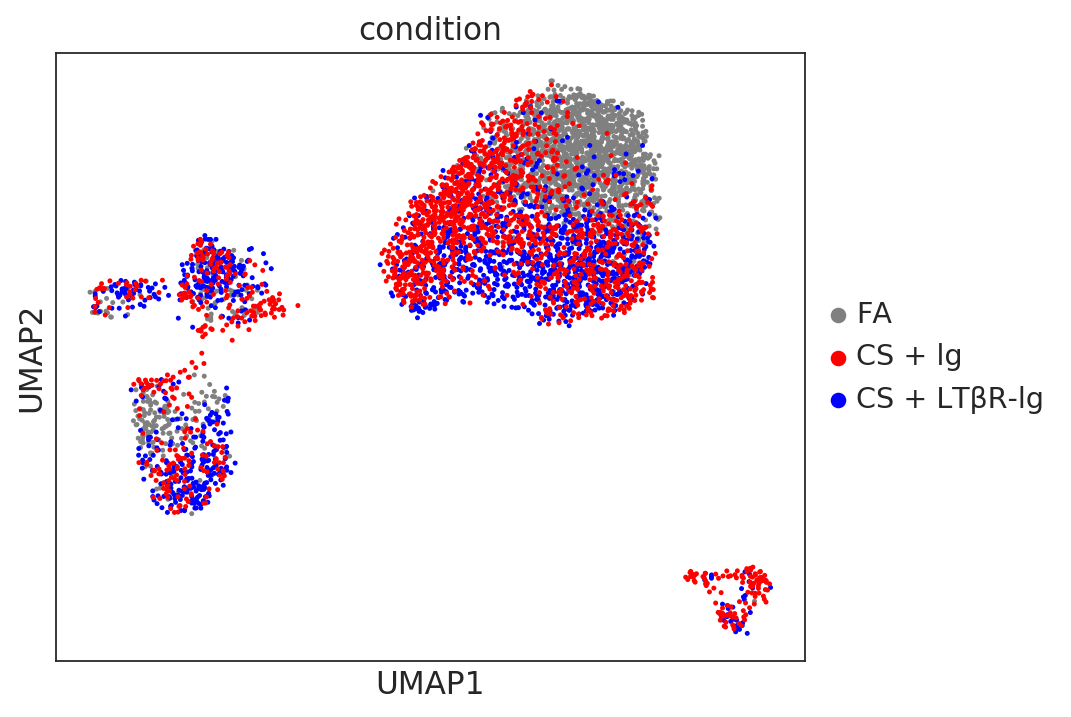

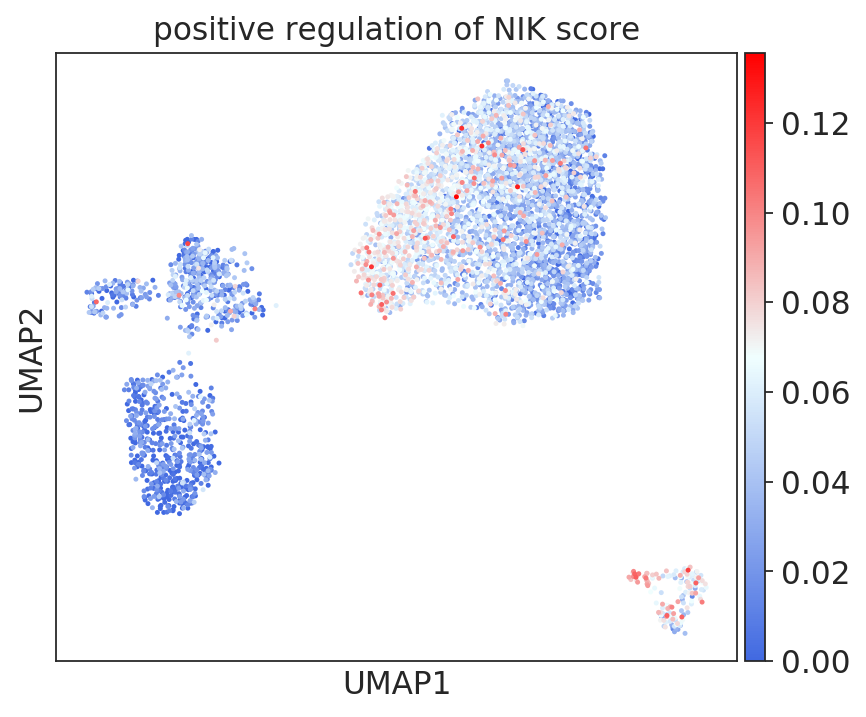

In [8]:
## Generate Epithelial subset
sub = adata[adata.obs.cell_type.isin(["Club/Goblet", "AT2", "Ciliated", "AT1"])].copy()

sc.pp.pca(sub, n_comps = 50, use_highly_variable = True)
sc.pp.neighbors(sub, n_pcs = 40, n_neighbors = 10)
sub.uns["cell_type_colors"] = ["#b36bf6", "#bfe9ac", "#17202A", "#d62728"]

sc.tl.umap(sub)
sc.pl.umap(sub, color = "cell_type", size = 20)
sc.pl.umap(sub, color = "condition", size = 20)
sc.pl.umap(sub, color = s_name, cmap = blue_red, vmin = 0, size = 20)

### Figure 1 l and Suplementary Figure 2 d) positive Regulation of NIK score

In [10]:
def plot_gene_boxplot(tab, xlabel = "cell_types", condition = None, figsize = (10, 5), width = 0.7,
                      palette = ["gray", "red", "blue"], score = "Axin2"):
    
    fig, ax = plt.subplots()
    fig.set_size_inches(figsize)

    fig = sb.boxplot(data = tab, x = xlabel, y = score, width = width, hue = condition, palette = palette)
    ax.legend(bbox_to_anchor = (1.05, 1.06))
    
    plt.setp(ax.artists, edgecolor = "black")
    plt.setp(ax.lines, color = "black")
    sb.despine()
    plt.show()

... storing 'celltype_group' as categorical


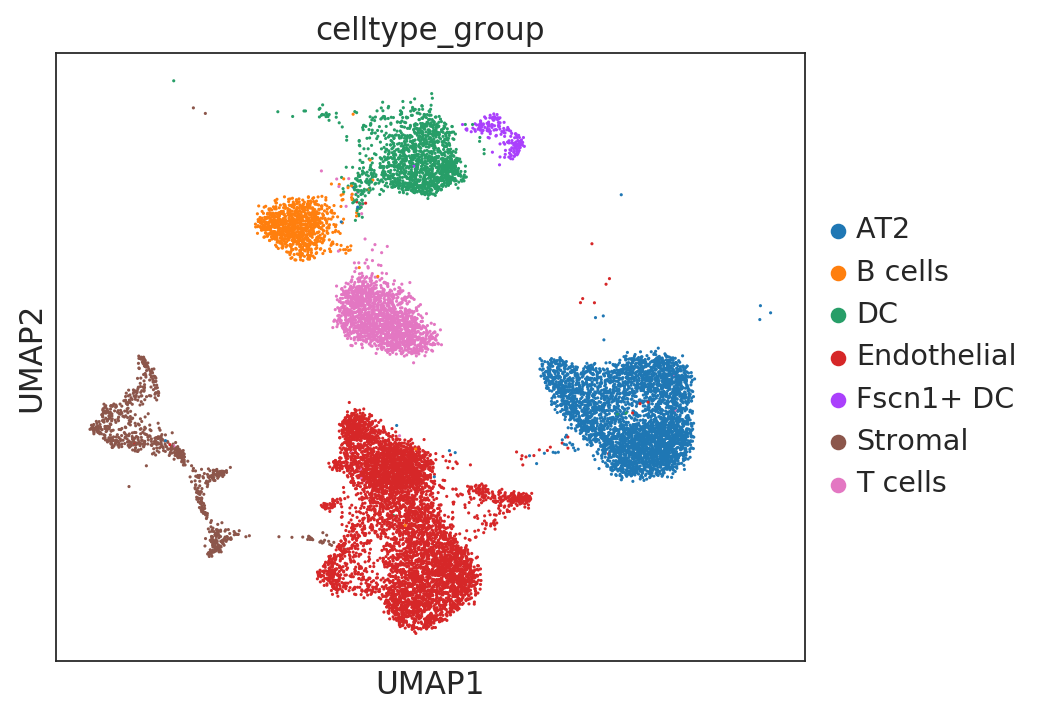

In [9]:
## Combine some of the annotations
sub = adata[adata.obs.cell_type.isin(["AT2", "EC", "CEC", "LEC", "DC", "Fscn1+ DC", 
                                      "Fibroblasts", "SMC/Peri", "T cells", "B cells"])].copy()
ct_map = {"EC": "Endothelial", "CEC": "Endothelial", "LEC": "Endothelial", 
          "Fibroblasts": "Stromal", "SMC/Peri": "Stromal"}

sub.obs["celltype_group"] = [ct_map[c] if c in ct_map.keys() else c for c in sub.obs.cell_type]
sc.pl.umap(sub, color = "celltype_group")

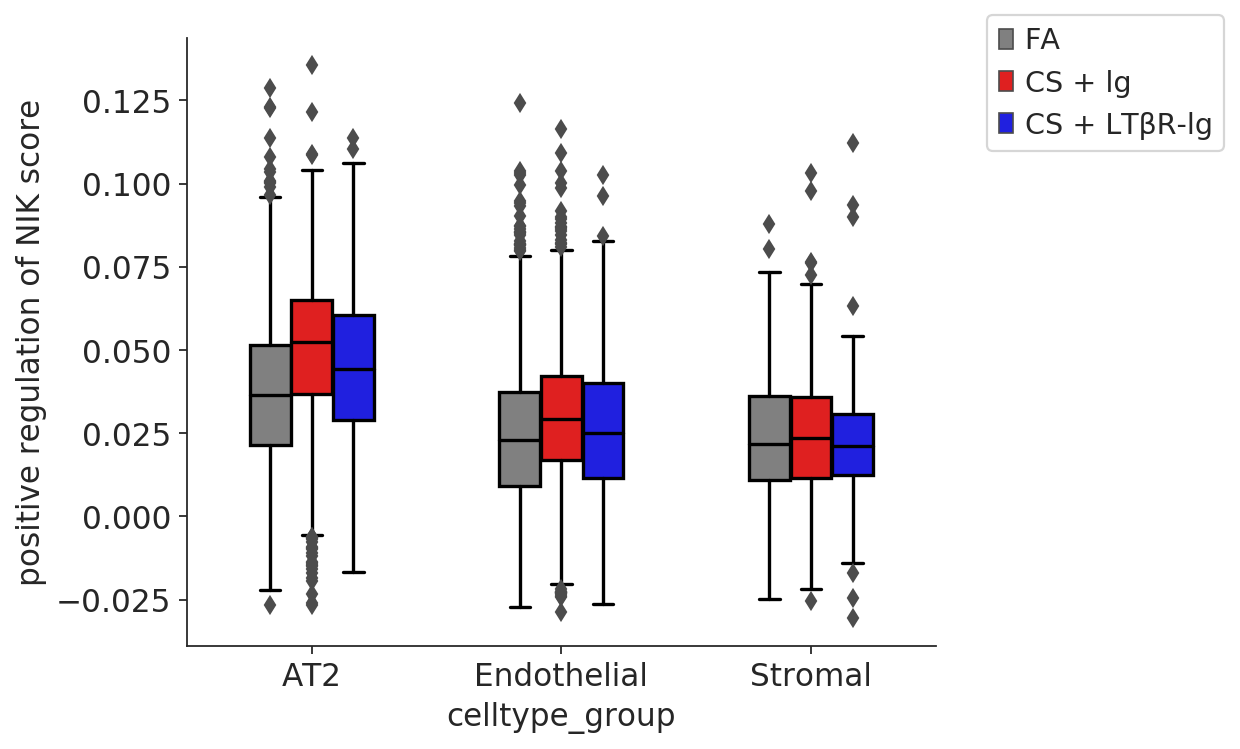

In [11]:
xlabel = "celltype_group"
condition = "condition"
s_name = "positive regulation of NIK score"

cells = sub.obs.celltype_group.isin(["AT2", "Endothelial", "Stromal"])
score = sc.get.obs_df(sub[cells], keys = [s_name, condition, xlabel], layer = None, use_raw = True)
plot_gene_boxplot(score, score = s_name, xlabel = xlabel,  condition = condition,
                  figsize = (6, 5), palette = ["gray", "red", "blue"], width = 0.5)

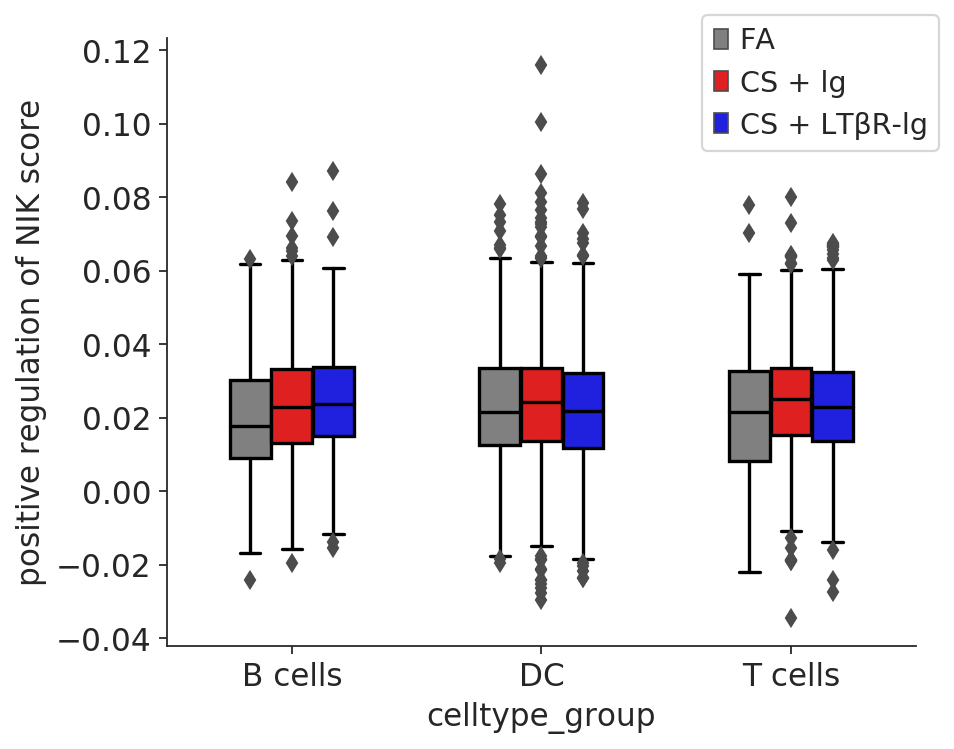

In [12]:
xlabel = "celltype_group"
condition = "condition"
s_name = "positive regulation of NIK score"

cells = sub.obs.celltype_group.isin(["B cells", "DC", "T cells"])
score = sc.get.obs_df(sub[cells], keys = [s_name, condition, xlabel], layer = None, use_raw = True)
plot_gene_boxplot(score, score = s_name, xlabel = xlabel,  condition = condition,
                  figsize = (6, 5), palette = ["gray", "red", "blue"], width = 0.5)